In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mygrad.components as mc
import mygrad.functional as mf
from mygrad.losses import MeanSquareErrorLoss
from mygrad.optimizers import SGD
from mygrad.preprocessors import MinMaxScaler, StandardScaler
from mygrad.trainers2 import Trainer, ProgressBar
from mygrad.dataloaders import NumpyRegressionDataloader

# Simple Square

In [3]:
train_df = pd.read_csv("../mio1/regression/square-simple-training.csv")
test_df = pd.read_csv("../mio1/regression/square-simple-test.csv")

In [4]:
X_train = train_df["x"].values
y_train = train_df["y"].values

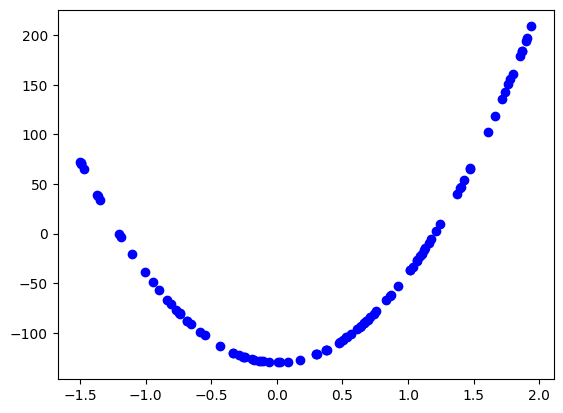

In [5]:
p = np.argsort(X_train)
plt.plot(X_train[p], y_train[p], "bo")

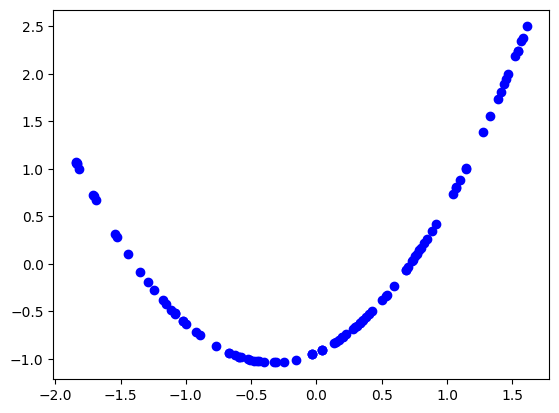

In [6]:
input_normalizer = StandardScaler()
output_normalizer = StandardScaler()

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_train_scaled = input_normalizer.fit_transform(X_train)
y_train_scaled = output_normalizer.fit_transform(y_train)

plt.plot(X_train_scaled[p, :], y_train_scaled[p, :], "bo")

In [7]:
model = mc.Sequential(
    mc.Linear(1, 10, init="he"),
    mc.Tanh(),
    mc.Linear(10, 10, init="he"),
    mc.Tanh(),
    mc.Linear(10, 1, init="uniform"),
)
optimizer = SGD(model.parameters(), learning_rate=0.2)
loss = MeanSquareErrorLoss()

train_dataloader = NumpyRegressionDataloader(X_train_scaled, y_train_scaled, batch_size=10, shuffle=True)
trainer = Trainer(model, optimizer, loss, train_dataloader, plugins=[ProgressBar()])
train_losses, _ = trainer.train(2000)

Training epochs:   0%|          | 0/2000 [00:00<?, ?it/s]

TypeError: cannot unpack non-iterable NoneType object

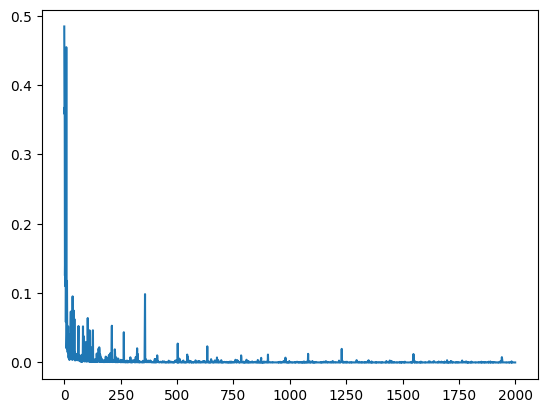

In [ ]:
plt.plot(train_losses)

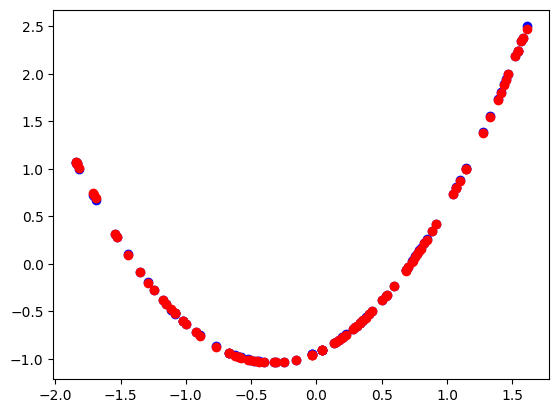

In [ ]:
y_pred = model.forward(X_train_scaled)
plt.plot(X_train_scaled, y_train_scaled, "bo")
plt.plot(X_train_scaled, y_pred, "ro")


MSE: [0.62348554]


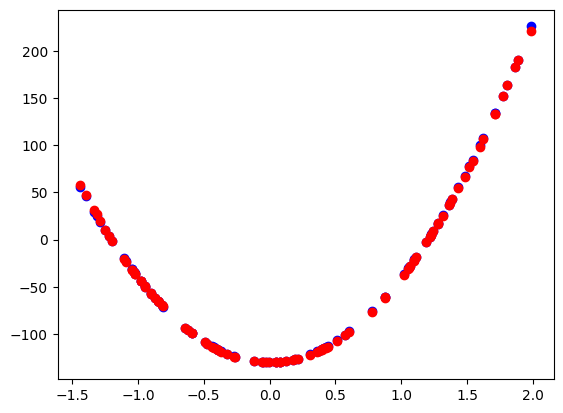

In [ ]:
X_test = test_df["x"].values.reshape(-1, 1)
y_test = test_df["y"].values.reshape(-1, 1)

X_test_scaled = input_normalizer.transform(X_test)

y_pred_scaled = model.forward(X_test_scaled)
y_pred = output_normalizer.reverse(y_pred_scaled)

plt.plot(X_test, y_test, "bo")
plt.plot(X_test, y_pred, "ro")

print(f"MSE: {mf.mse(y_pred, y_test)}")
